In [1]:
import scqubits as scq
import numpy as np
# import autograd.numpy as np
import matplotlib.pyplot as plt
import scipy as sci

from functions import*

EL1 = EL2 = 0.4
d1 = d2 = 4
sdim = 6
def fsf(flux1,flux2,phi3):

    Hs, phis, charges = SNAIL(phi3, 0.2, 3, 30*2*np.pi, 0.2*2*np.pi,sdim)
    print(phis[0][0])
    H1,H2,phi1,phi2 = fluxonium(flux1,flux2,EL1,EL2,d1,d2)
    If1 = np.identity(d1)
    If2 = np.identity(d2)
    Is = np.identity(sdim)
    
    Hs = np.kron(np.kron(Hs, If2), If1)
    H2 = np.kron(np.kron(Is, H2), If1)
    H1 = np.kron(np.kron(Is, If2), H1)
    
    H_int1 = -EL1/2 *  np.kron(np.kron(phis, If2),phi1)*2*np.pi
    H_int2 = EL2/2 *  np.kron(np.kron(phis, phi2), If1)*2*np.pi
    
    H = Hs + H2 + H1 + (H_int1+H_int2)

    Hc = np.kron(np.kron(charges, If2), If1)
    return H, Hc

# def fsof(flux1,flux2,phi3,fluxsh1,fluxsh2):
#     _,_,Hs, phis,  = SNAIL_paras(phi3, 0.2, 3, 30*2*np.pi, 0.2*2*np.pi,sdim)
#     fluxsh1 = fluxsh1*2*np.pi
#     fluxsh2 = fluxsh2*2*np.pi
#     H1,H2,phi1,phi2 = fluxonium(flux1,flux2,EL1,EL2,d1,d2)
#     If1 = np.identity(d1)
#     If2 = np.identity(d2)
#     Is = np.identity(sdim)
    
#     Hs = np.kron(np.kron(Hs, If2), If1)
#     H2 = np.kron(np.kron(Is, H2), If1)
#     H1 = np.kron(np.kron(Is, If2), H1)
    
#     H_int1 = EL1/2 *  np.kron(np.kron(phis, phi2), If1)*2*np.pi - EL1*2*np.pi*np.kron(np.kron(Is, If2), phi1)*fluxsh1 - EL1*2*np.pi*np.kron(np.kron(phis, If2), If1)*fluxsh1/2 
#     H_int2 = -EL2/2 *  np.kron(np.kron(phis, If2),phi1)*2*np.pi - EL2*2*np.pi*np.kron(np.kron(Is, phi2), If1)*fluxsh2 + EL2*2*np.pi*np.kron(np.kron(phis, If2), If1)*fluxsh2/2 
    
#     return Hs + H2 + H1,(H_int1 + H_int2 )

def fsf2(flux1,flux2,phi3,fluxsh1,fluxsh2):
    
    Hs, phis, charges = SNAIL(phi3, 0.2, 3, 30*2*np.pi, 0.2*2*np.pi,sdim)

    H1,H2,phi1,phi2 = fluxonium(flux1,flux2,EL1,EL2,d1,d2)
    If1 = np.identity(d1)
    If2 = np.identity(d2)
    Is = np.identity(sdim)
    
    Hs = np.kron(np.kron(Hs, If2), If1)
    H2 = np.kron(np.kron(Is, H2), If1)
    H1 = np.kron(np.kron(Is, If2), H1)
    
    H_int1 = -EL1/2 *  np.kron(np.kron(phis, If2),phi1)*2*np.pi - EL1*2*np.pi*np.kron(np.kron(Is, If2), phi1)*fluxsh1 - EL1*2*np.pi*np.kron(np.kron(phis, If2), If1)*fluxsh1/2 
    H_int2 =  EL2/2 *  np.kron(np.kron(phis, phi2), If1)*2*np.pi - EL2*2*np.pi*np.kron(np.kron(Is, phi2), If1)*fluxsh2 + EL2*2*np.pi*np.kron(np.kron(phis, If2), If1)*fluxsh2/2
    
    H_int1 = -EL1/2 *  np.kron(np.kron(phis, If2),phi1-fluxsh1*If1)*2*np.pi - EL1*2*np.pi*np.kron(np.kron(Is, If2), phi1)*fluxsh1 
    H_int2 =  EL2/2 *  np.kron(np.kron(phis, phi2-fluxsh2*If2), If1)*2*np.pi - EL2*2*np.pi*np.kron(np.kron(Is, phi2), If1)*fluxsh2 
    return Hs + H2 + H1 , (H_int1 +H_int2 )


In [3]:
SNAIL(0.4, 0.2, 3, 30*2*np.pi, 0.2*2*np.pi,sdim)[1]

array([[-7.16437502e-02, -4.83070032e-01,  3.19655704e-02,
        -3.17949423e-03, -5.19286673e-04,  2.15950251e-04],
       [-4.83070032e-01, -2.08096035e-01, -6.86002988e-01,
         4.53569235e-02, -5.25563070e-03,  3.47939217e-04],
       [ 3.19655704e-02, -6.86002988e-01, -3.05182058e-01,
        -8.30806903e-01,  2.35654289e-02,  2.13793965e-02],
       [-3.17949423e-03,  4.53569235e-02, -8.30806903e-01,
        -2.63230112e-01, -8.72839986e-01,  3.17391144e-02],
       [-5.19286673e-04, -5.25563070e-03,  2.35654289e-02,
        -8.72839986e-01, -4.87319451e-02,  8.79981692e-01],
       [ 2.15950251e-04,  3.47939217e-04,  2.13793965e-02,
         3.17391144e-02,  8.79981692e-01,  8.96883900e-01]])

In [27]:
from scipy.optimize import minimize
def objective_function(x, phi3):
    fluxsh1, fluxsh2 = x
    flux1 = 0.5
    flux2 = 0.5

    H0, V = fsf2(flux1, flux2, phi3, fluxsh1, fluxsh2)
    H0, V = shuffle_matrices(H0, V)
    swt_result = swt_subspace(H0, V, [0, 1, 2, 3])
    
    # Sum the relevant submatrices
    sum_matrix = sum(swt_result[1][i][0:6, 0:6] for i in range(4))
    
    # Calculate specific matrix elements
    element_sum = (np.abs(sum_matrix[0, 1]) + np.abs(sum_matrix[0, 2]) + 
                   np.abs(sum_matrix[1, 3]) + np.abs(sum_matrix[2, 3]))
    
    return element_sum

# Function to perform optimization for a given phi3
def optimize_for_phi3(phi3):
    # Initial guess
    x0 = [-0.015, -0.015]  # Starting point in the middle of your range

    # Bounds for the optimization
    bounds = [(-0.05, 0.05), (-0.1, 0.1)]

    # Perform the optimization
    result = minimize(objective_function, x0, args=(phi3,), method='Nelder-Mead', bounds=bounds)
    
    return result

In [28]:
fsf(1/2,1/2,0.4)

-0.07164375019829909


(array([[-5.02991134e-15,  2.45024085e-01,  8.28614313e-16, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.45024085e-01,  2.57328586e+00, -1.21590979e-01, ...,
         -1.76950976e-04,  0.00000000e+00,  0.00000000e+00],
        [ 8.28614313e-16, -1.21590979e-01,  3.50626542e+01, ...,
          0.00000000e+00, -1.76950976e-04,  0.00000000e+00],
        ...,
        [ 0.00000000e+00, -1.76950976e-04,  0.00000000e+00, ...,
          1.73157377e+02,  1.52215638e+00,  4.53414623e-15],
        [ 0.00000000e+00,  0.00000000e+00, -1.76950976e-04, ...,
          1.52215638e+00,  2.05646745e+02, -2.81252388e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          4.53414623e-15, -2.81252388e+00,  2.21023602e+02]]),
 array([[0.+1.97864086e-18j, 0.+0.00000000e+00j, 0.+0.00000000e+00j, ...,
         0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.+0.00000000e+00j],
        [0.+0.00000000e+00j, 0.+1.97864086e-18j, 0.+0.00000000e+00j, ...,
         0.

In [29]:
-0.07164375019829909/2/np.pi/2

-0.005701228492850129

In [30]:
result = optimize_for_phi3(0.4)

In [31]:
result.x

array([ 0.03832558, -0.0382229 ])

In [24]:
# result.x

In [25]:
fluxsh1,fluxsh2 =  0.02, 0.03

In [26]:
fluxsh1

0.02

In [27]:
H,Hc=fsf(0.5+fluxsh1,0.5+fluxsh2,0.4)

In [28]:
energy0, U = np.linalg.eigh(H)
    # energy0, U = sort_eigenpairs(energy0, U)
energy0 -= energy0[0]

In [29]:
(energy0/2/np.pi)[2]

0.7189958753763163

In [30]:
H0,V = fsf2(0.5,0.5,0.4,fluxsh1,fluxsh2)
H = H0+V
energy0, U = np.linalg.eigh(H)
    # energy0, U = sort_eigenpairs(energy0, U)
energy0 -= energy0[0]
(energy0/2/np.pi)[2]
# 0.3988411499872336

0.718995269132326

In [282]:
energy0, U = sort_eigenpairs(energy0, U)
Ud = U.T.conjugate()
H = np.diag(energy0)
Hc = Ud @ Hc @ U

In [283]:
print(Hc[0,1],Hc[0,d1],Hc[0,d1+1])
print(Hc[1,d1],Hc[1,d1+1],)


-0.02322210829475267j 0.02077029199556059j -0.000839630226944324j
-0.0005616056482338783j -0.031965204402394705j


In [284]:
H0, V = fsf2(0.5, 0.5, 0.4,fluxsh1 , fluxsh2)
H0, V = shuffle_matrices(H0, V)
swt_result = swt_subspace(H0, V, [0, 1, 2, 3])

In [185]:
S1,S2,S3 = swt_result[0]

In [190]:
H,Hc=fsf(0.5,0.5,0.4)
H, Hc = shuffle_matrices(H, Hc)
def operantor_trans(S,op):
    S1,S2 = S
    firstorder = commutator(S1,op)
    secondorder =  S2@op - op@S2
    return firstorder,secondorder
charge1,charge2 = operantor_trans([S1,S2],Hc)

In [192]:
charge2[0:4,0:4]

array([[0.-8.67361738e-19j, 0.-4.24982160e-05j, 0.-6.00143454e-05j,
        0.+2.16118761e-03j],
       [0.+4.24982160e-05j, 0.+2.16840434e-19j, 0.+3.17808234e-04j,
        0.-6.00143454e-05j],
       [0.+6.00143454e-05j, 0.-3.17808234e-04j, 0.+6.50521303e-19j,
        0.-4.24982160e-05j],
       [0.-2.16118761e-03j, 0.+6.00143454e-05j, 0.+4.24982160e-05j,
        0.+1.73472348e-18j]])

In [188]:
def l1l2l3(flux1 , flux2,phi3):
    H , Hc = fsf(flux1,flux2,phi3)
    energy0, U = np.linalg.eigh(H)
    energy0 -= energy0[0]
    l1 = energy0[1]
    l2 = energy0[2]
    l3 = energy0[3]
    return l1,l2,l3

def cost_func(flux1 , flux2, phi3):
    l1, l2,l3 = l1l2l3(flux1 , flux2,phi3)
    h = 1e-7
    l1_forward_phi1, l2_forward_phi1,l3 = l1l2l3(flux1+h , flux2,phi3)
    l1_backward_phi1, l2_backward_phi1,l3 = l1l2l3(flux1 - h , flux2,phi3)

    dl1_dphi1 = (l1_forward_phi1 - l1_backward_phi1) / (2 * h)
    dl2_dphi1 = (l2_forward_phi1 - l2_backward_phi1) / (2 * h)

    # Derivatives with respect to phi2
    l1_forward_phi2, l2_forward_phi2 ,l3= l1l2l3(flux1 , flux2+h,phi3)
    l1_backward_phi2, l2_backward_phi2,l3 = l1l2l3(flux1 , flux2-h,phi3)

    dl1_dphi2 = (l1_forward_phi2 - l1_backward_phi2) / (2 * h)
    dl2_dphi2 = (l2_forward_phi2 - l2_backward_phi2) / (2 * h)
    print(np.abs(dl1_dphi1),np.abs(dl2_dphi2),np.abs(dl1_dphi2) ,np.abs(dl2_dphi2))
    return np.abs(dl1_dphi1) + np.abs(dl2_dphi1) + np.abs(dl1_dphi2) + np.abs(dl2_dphi2)

In [41]:
beta,N,Ej,Ec = 0.2,3,30*2*np.pi,0.2*2*np.pi
EL1 = EL2 = 0.2
d1 = d2 = 8
sdim = 6

flux1 = 0.5
flux2 = 0.5
fluxsh1 = fluxsh2 =-0.01340625

phi3 = 0.42
H0,V = fsf2(flux1,flux2,phi3,fluxsh1,fluxsh2)
H0, V= shuffle_matrices(H0, V)
# check derivative
# fluxsh1,fluxsh2 = -0.01359786987, -0.01361668396
# flux1 = 0.5 + fluxsh1
# flux2 = 0.5 + fluxsh2
# phi3 = 0.42
# cost_func(flux1 , flux2, phi3)

In [42]:
from scipy.optimize import minimize
def objective_function(x, phi3):
    fluxsh1, fluxsh2 = x
    flux1 = 0.5
    flux2 = 0.5

    H0, V = fsf2(flux1, flux2, phi3, fluxsh1, fluxsh2)
    H0, V = shuffle_matrices(H0, V)
    swt_result = swt_subspace(H0, V, [0, 1, 2, 3])
    
    # Sum the relevant submatrices
    sum_matrix = sum(swt_result[1][i][0:6, 0:6] for i in range(4))
    
    # Calculate specific matrix elements
    element_sum = (np.abs(sum_matrix[0, 1]) + np.abs(sum_matrix[0, 2]) + 
                   np.abs(sum_matrix[1, 3]) + np.abs(sum_matrix[2, 3]))
    
    return element_sum

# Function to perform optimization for a given phi3
def optimize_for_phi3(phi3):
    # Initial guess
    x0 = [-0.015, -0.015]  # Starting point in the middle of your range

    # Bounds for the optimization
    bounds = [(-0.03, 0.03), (-0.03, 0.03)]

    # Perform the optimization
    result = minimize(objective_function, x0, args=(phi3,), method='Nelder-Mead', bounds=bounds)
    
    return result

In [43]:
def calculate_J1_J2(phi3):
    result = optimize_for_phi3(phi3)
    fluxsh1, fluxsh2 = result.x
    flux1, flux2 = 0.5, 0.5
    H0, V = fsf2(flux1, flux2, phi3, fluxsh1, fluxsh2)
    H0, V = shuffle_matrices(H0, V)
    swt_result = swt_subspace(H0, V, [0, 1, 2, 3])
    sum_matrix = sum(swt_result[1][i][0:6, 0:6] for i in range(4))
    J1, J2 = sum_matrix[0, 3], sum_matrix[1, 2]
    evals_app = np.diag(sum_matrix)
    evals_app = evals_app - evals_app[0]
    zz = (evals_app[3] - evals_app[2] - evals_app[1])
    return phi3, J1, J2,zz
def get_zz(phi3):
    result = optimize_for_phi3(phi3)
    fluxsh1, fluxsh2 = result.x
    flux1, flux2 = 0.5, 0.5
    H0, V = fsf(flux1+ fluxsh1, flux2+fluxsh2, phi3,)
    evals,_ = np.linalg.eigh(H0)
    evals -= evals[0]
    zz = evals[3]-evals[2]-evals[1]
    
    H0, V = fsof(flux1, flux2, phi3,fluxsh1,fluxsh2)
    H0, V = shuffle_matrices(H0, V)
    swt_result = swt_subspace(H0, V, [0, 1, 2, 3])
    sum_matrix = sum(swt_result[1][i][0:6, 0:6] for i in range(4))
    J1, J2 = sum_matrix[0, 3], sum_matrix[1, 2]
    evals_app = np.diag(sum_matrix)
    evals_app = evals_app - evals_app[0]
    zzso = (evals_app[3] - evals_app[2] - evals_app[1])
    return zz,zzso

In [6]:
from joblib import Parallel, delayed
phi3_values = np.linspace(0, 0.5, 50)
results = Parallel(n_jobs=-1)(delayed(calculate_J1_J2)(phi3) for phi3 in phi3_values)
    # Unpack results
results2 = Parallel(n_jobs=-1)(delayed(get_zz)(phi3) for phi3 in phi3_values)
phi3_array, J1_array, J2_array , zz_array= zip(*results)
zz,zzso = zip(*results2)

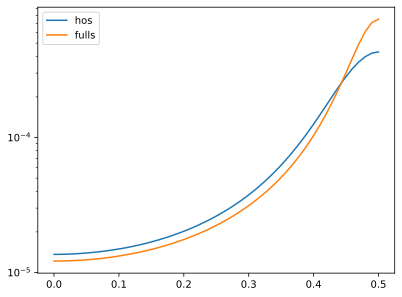

In [7]:
# plt.plot(phi3_array,np.abs(np.array(zz_array)/2/np.pi)-np.abs(np.array(zz)/2/np.pi))
plt.plot(phi3_array,np.abs(np.array(zz_array)/2/np.pi),label = "hos")
plt.plot(phi3_array,np.abs(np.array(zzso)/2/np.pi),label = "fulls")
plt.yscale('log')
plt.legend()

In [18]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.10g" % x))

In [19]:
def approximate_J(phi3):
    omega_s,phis,_,_ = SNAIL_paras(phi3, 0.2, 3, 30*2*np.pi, 0.2*2*np.pi)
    H1,H2,phi1,phi2 = fluxonium(flux1,flux2)
    phi101 = phi1[0,1]
    phi201 = phi2[0,1]
    return (EL1*2*np.pi*phi101*phis)*(EL2*2*np.pi*phi201*phis)*4/omega_s/2/2/np.pi

In [20]:
J_app = []
for phi3 in phi3_values:
    J_app.append(approximate_J(phi3))
  

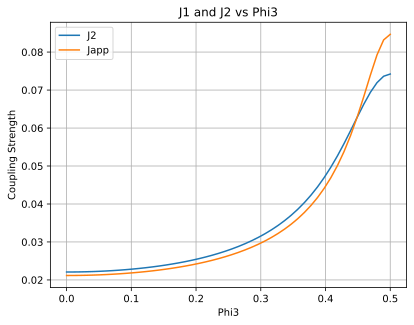

In [25]:
# plt.figure(figsize=(12, 6))
# plt.plot(phi3_array, np.array(J1_array)-np.array(J2_array), label='J1')
plt.plot(phi3_array, np.array(J2_array)/2/np.pi, label='J2')
plt.plot(phi3_array, np.abs(np.array(J_app)), label='Japp')
plt.xlabel('Phi3')
plt.ylabel('Coupling Strength')
plt.title('J1 and J2 vs Phi3')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
phi3 = 0
result = optimize_for_phi3(phi3)
fluxsh1, fluxsh2 = result.x
flux1, flux2 = 0.5, 0.5
H0, V = fsf2(flux1, flux2, phi3, fluxsh1, fluxsh2)
H0, V = shuffle_matrices(H0, V)
swt_result = swt_subspace(H0, V, [0, 1, 2, 3])
sum_matrix = sum(swt_result[1][i][0:6, 0:6] for i in range(4))

In [146]:
evals,_ = np.linalg.eigh(H0+V)
evals -= evals[0]
evals[3]-evals[2]-evals[1]

-7.581508591192332e-05

In [147]:
evals_app = np.diag(sum_matrix)
evals_app = evals_app - evals_app[0]

In [148]:
(evals_app[3] - evals_app[2] - evals_app[1])

-7.640042767614874e-05

In [134]:
result.fun/4/2/np.pi

1.3468977685347782e-16

In [135]:
result.x

array([-0, -0])

In [131]:
import numpy as np
import qutip as qt

def create_hamiltonian(omega_q1, omega_q2, J):
    # Define Pauli matrices
    sx = qt.sigmax()
    sy = qt.sigmay()
    sz = qt.sigmaz()
    
    # Identity matrix
    I = qt.qeye(2)
    
    # Create the Hamiltonian
    H = (omega_q1/2 * qt.tensor(sz, I) + 
         omega_q2/2 * qt.tensor(I, sz) + 
         J * qt.tensor(sx, sx))
    
    return H

def diagonalize_hamiltonian(H):
    # Diagonalize the Hamiltonian
    eigenvalues, eigenvectors = H.eigenstates()
    
    return eigenvalues, eigenvectors

# Example parameters (you can change these)
omega_q1 = 2 * np.pi * 5  # 5 GHz
omega_q2 = 2 * np.pi * 5.5  # 5.5 GHz
J = 2 * np.pi * 0.5  # 100 MHz

# Create the Hamiltonian
H = create_hamiltonian(omega_q1, omega_q2, J)

print("Hamiltonian:")
print(H)

# Diagonalize the Hamiltonian
eigenvalues, eigenvectors = diagonalize_hamiltonian(H)

print("\nEigenvalues:")
print(eigenvalues)

# Calculate the ZZ coupling strength
zz_coupling = (eigenvalues[0] + eigenvalues[3] - eigenvalues[1] - eigenvalues[2])

print(f"\nEffective ZZ coupling strength: {zz_coupling / (2*np.pi):.6f} GHz")

Hamiltonian:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[32.98672286 0 0 3.141592654]
 [0 -1.570796327 3.141592654 0]
 [0 3.141592654 1.570796327 0]
 [3.141592654 0 0 -32.98672286]]

Eigenvalues:
[-33.13598481 -3.512407366 3.512407366 33.13598481]

Effective ZZ coupling strength: 0.000000 GHz
